# Data Analysis Drugs 288 Up

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os  
import shutil
import random
from sklearn.metrics import mean_squared_error
import scipy.stats as st 
import tqdm
import pickle
import re
from io import StringIO
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import tarfile

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 600
plt.style.use('ggplot')
random.seed(100)

In [3]:
wd = os.getcwd()
wd

path = os.path.join(os.path.join(wd, "data"), "start_288")
path
path1 = os.path.join(os.path.join(wd, "data"), "TSV_LOG")

In [4]:
for d in os.listdir(path):
    folder = os.path.join(path, d)
    if os.path.isdir(folder):
        # print("fdjajflas")
        # curr = os.path.join(folder, d)
        
        for f in tqdm.tqdm(os.listdir(folder), desc=f"{folder}"):
            sub_dir = os.path.join(folder, f)
            # print(sub_dir)
            if os.path.isdir(sub_dir):
                # print(sub_dir)
                
                for t in os.listdir(sub_dir):

                    file = os.path.join(sub_dir, t)
                    if not os.path.isdir(file) and tarfile.is_tarfile(file):
                        # print(file)
                        # print(sub_dir)
                        tf = tarfile.open(file)
                        tf.extractall(sub_dir)
                        tf.close()

/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9010146.amn-0001: 100%|██████████| 42/42 [00:10<00:00,  3.86it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009232.amn-0001: 100%|██████████| 42/42 [00:09<00:00,  4.21it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009266.amn-0001: 100%|██████████| 42/42 [00:09<00:00,  4.25it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009313.amn-0001: 100%|██████████| 42/42 [00:10<00:00,  4.19it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009646.amn-0001: 100%|██████████| 41/41 [00:09<00:00,  4.25it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009183.amn-0001: 100%|██████████| 42/42 [00:09<00:00,  4.28it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009628.amn-0001: 100%|██████████| 42/42 [00:10<00:00,  4.14it/s]
/Users/jakegwinn/Documents/argonne_all/argonne/data/start_288/9009458.amn-0001: 100%|██████████| 40/40 [

## Functions

In [5]:
def get_data_ALL(path, wanted_jobs):
    """Get all drug data into one dictionary from all specified jobs

    Args:
        path (string): path to list of tsv's
        wanted_jobs (list): list of jobs to look through

    Returns:
        dictonary: dictionary indexed by drug name
    """
    # wanted_jobs = os.listdir(path)
    drugs_perf = {}

    for job in os.listdir(path):
        j_path = os.path.join(path, job)
        
        if job in wanted_jobs:
        
            for fold in os.listdir(j_path):
                
                fold_path = os.path.join(j_path, fold)
                
                if os.path.isdir(fold_path):
                
                    inner_most = os.path.join(fold_path, job) 
                    # print(f"###{fold}####")
                    for num in os.listdir(inner_most):
                        num_path = os.path.join(inner_most, num)
                        tsv_file = os.path.join(num_path, "predicted.tsv")
                        log_file = os.path.join(num_path, "python.log")
                # if job in wanted_jobs:    
                #     for model in tqdm.tqdm(os.listdir(curr), desc=f"{job}"):
                #         inner = os.path.join(curr, model)
                        
                #         for subdir, dirs, files in os.walk(inner):
                #             for file in files:
                                # f = os.path.join(subdir, file)
                        df = pd.read_csv(tsv_file, sep="\t")
                        # print(df.columns)
                        
                        drug = df["Drug1"][0]
                        # print(drug)
                        if drug not in drugs_perf:
                            drugs_perf[drug] = []
                            drugs_perf[drug].append(df)
                        else:
                            drugs_perf[drug].append(df)
                            

    drug_dict = {}
    for key, value in tqdm.tqdm(drugs_perf.items()):
        drug_dict[key] = pd.concat(value)
        
        
    return drug_dict

In [6]:
def get_all_drug_dfs(drg, path, wanted_jobs):
    """gets drug dfs and locations of given drug

    Args:
        drg (string): specific drug wanted
        path (string): path to list of TSV's
        wanted_jobs (list): list of jobs to search through

    Returns:
        two lists: list of dfs and list of drug locations
    """
    
    drug_loc = []
    
    # Iterate over every job in the directory 
    for job in os.listdir(path):
        j_path = os.path.join(path, job)
        
        if job in wanted_jobs:
        
            for fold in os.listdir(j_path):
                fold_path = os.path.join(j_path, fold)
                
                if os.path.isdir(fold_path):
                
                    inner_most = os.path.join(fold_path, job) 
                    # print(f"###{fold}####")
                    for num in os.listdir(inner_most):
                        num_path = os.path.join(inner_most, num)
                        tsv_file = os.path.join(num_path, "predicted.tsv")
                        log_file = os.path.join(num_path, "python.log")
        
        
        # for job in os.listdir(path):
        #     curr = os.path.join(path, job)
            
        #     # Check if current job is in the wanted_jobs list 
        #     if job in wanted_jobs:
        #         print(f"----------{job}----------")
        #         samples_rmse_curr = {}
                
        #         # Iterates over every model in the job
        #         for model in tqdm.tqdm(os.listdir(curr)):
        #             inner = os.path.join(curr, model)
                    
        #             # Iterates over every file within the model 
        #             for subdir, dirs, files in os.walk(inner):
        #                 for file in files:
                            
                            # Creates dataframe
                        # f = os.path.join(subdir, file)
                        df = pd.read_csv(tsv_file, sep="\t")
                        
                        # Gets drug
                        drug = df["Drug1"][0]
                        # print(drug)
                        fold_num = fold
                        number = num
                        # Checks to see if drug is the same as wanted drug
                        if drg == drug:
                            drug_loc.append((job, fold_num, number))

    dfs = []
    locs = []
    
    # Iterates over all the found locations of the drg TSVs
    for j,folder, number in drug_loc:
        
        file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(path, j), folder), j), number), "predicted.tsv")

        # Make a dataframe and include a new column with what job it is from
        df = pd.read_csv(file, sep="\t")
        df["Job"] = j
        
        locs.append((j,folder))
        dfs.append(df)

    return dfs, locs

In [7]:
def make_distrib_plot(drg, d_dict):
    
    # Get dataframe for specified drug
    drug_df = d_dict[drg]
    
    # Plot Distribution 
    fig, ax1 = plt.subplots()
    
    drug_df["AUCError"].plot.kde(ax=ax1, 
                            grid = True, )
    drug_df["AUCError"].plot.hist(ax=ax1,
                            density = True, 
                            bins=30, 
                            rwidth = 0.9)

    ax1.set_title(f"Distribution of AUC Errors of {drg}\nAll Specified Jobs")
    ax1.set_ylabel("")
    ax1.set_xlabel("AUC Error")

In [8]:
def make_multiplot(drg, path, wanted_jobs):
    
    drug_dfs, drug_jobs = get_all_drug_dfs(drg=drg, path=path, wanted_jobs=wanted_jobs)
    
    # print(drug_dfs)
    
    # Get grid layout
    N = len(drug_dfs)
    x=np.floor(np.sqrt(N))
    y=np.ceil(N/x)
    
    print(f"TOTAL: {N}-----({x, y})")
    
    # Make Subplots
    fig, ax1 = plt.subplots(int(x), int(y), squeeze=False)
    fig.subplots_adjust(hspace=0.4, wspace = 0.45)
    fig.suptitle(f"Distribution of {drg} over all Individual Jobs")
    
    k = 0
    j = 0

    # Iterate over all subplots and plot each distribution for every specified job
    for i, d in enumerate(drug_dfs):
        # print(f"####### {(k,j)} #######")
        # print(d["AUCError"])

        k = int(k)
        j = int(j)
        d["AUCError"].plot.kde(ax=ax1[k][j] )
        d["AUCError"].plot.hist(ax=ax1[k][j],density = False, bins=30, rwidth = 0.9, xlim = (-1, 1))

        ax1[k][j].set_title(f"{drug_jobs[i][0]}", size = 7)
        ax1[k][j].set_ylabel("Frequency",size = 4 )
        ax1[k][j].set_xlabel("AUC Error", size = 4)
        
        k += 1
        k = k % x
        if k == 0:
            j += 1
        j = j % y

In [9]:
def boostraped_rmse(df, B): 
    """Create Bootsrtap sample of a statistic

    Args:
        x (num): values you want infrence from 
        B (in): Number of bootstrap samples
        statsFun (fun): metric you want infrence on 
    """
    x_auc = df["AUC"]
    x_pred_auc = df["PredictedAUC"]
    x_auc = np.array(x_auc)
    x_pred_auc = np.array(x_pred_auc)
    
    resampled_stat = []
    
    for b in tqdm.tqdm(range(B)):
        index = np.random.randint(0, len(x_auc), len(x_auc))
        sample_auc = x_auc[index]
        sample_pred_auc = x_pred_auc[index]
        
        bstatistic = mean_squared_error(sample_auc, sample_pred_auc, squared=False)
        resampled_stat.append(bstatistic)
        
    return np.array(resampled_stat)

In [34]:
def norm_hist(data):
    mu, std = st.norm.fit(data)
    # Plot the histogram.
    plt.hist(data, bins=30, density=True, alpha=0.6, color='b')
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = st.norm.pdf(x, mu, std)
    
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
    plt.title(title)
    
    plt.show()

## EDA

### Look for Epoch Differences

In [10]:
key_list = ["Job", "Folder", "Num", "drug", "epochs_wanted", "actual_epochs"]
data = {key: [] for key in key_list}

for j in os.listdir(path):
    # print(f"-------------{j}-------------")
    j_path = os.path.join(path, j)
    for fold in os.listdir(j_path):
        fold_path = os.path.join(j_path, fold)
        
        if os.path.isdir(fold_path):
        
            inner_most = os.path.join(fold_path, j) 
            # print(f"###{fold}####")
            for num in os.listdir(inner_most):
                num_path = os.path.join(inner_most, num)
                tsv_file = os.path.join(num_path, "predicted.tsv")
                log_file = os.path.join(num_path, "python.log")
                
                if os.path.exists(tsv_file):
                    df = pd.read_csv(tsv_file, sep="\t")
                    
                    drug = df["Drug1"][0]
                    
                    data["Job"].append(j)
                    data["Folder"].append(fold)
                    data["drug"].append(drug)
                    data["Num"].append(num)
                    prev_epoch_hist_length = len(data["actual_epochs"])
                    log_data = open(log_file, 'r')
                    # data["path"].append(tsv_file)
                    for line in log_data:

                        # Get specified epochs
                        matches_wanted = re.findall("'epochs': \d+", line)
                        
                        # get how many epochs it actually ran for
                        matches_history = re.findall("history_length: \d+", line)

                        if matches_wanted:
                            data["epochs_wanted"].append(matches_wanted[0][-2:]) 
                            # print(matches_wanted[0])
                        # else:
                        #     print("fjdashfkjsahdfhdajkshfkashfjsakhfdkajs")

                        if matches_history:
                            data["actual_epochs"].append(matches_history[0][-2:])
                            # print(matches_history[0])
                            
                        # else:
                        #     print("fjdashfkjsahdfhdajkshfkashfjsakhfdkajs")
                    # if len(data["actual_epochs"]) == prev_epoch_hist_length:
                    #     print(f"{j}: {num}")
                    #     print(log_file)
                    #     print("fdjhfajkhfjbhbhjgbhjghjgjgjhgjhgjhguhuivibkdhajahk")
                else:
                    print(f"{j}/{fold}/{j}/{num}")
                    
                # prev_epoch_hist_length = len(data["actual_epochs"])
    

In [11]:
df = pd.DataFrame(data)
df[["epochs_wanted", "actual_epochs"]] = df[["epochs_wanted", "actual_epochs"]].apply(pd.to_numeric)

In [12]:
df = (df.assign(
        epoch_diff =df["epochs_wanted"] - df["actual_epochs"]
    )
)
# print(len(df.index))
print(df.sort_values(["epochs_wanted", "actual_epochs"], ascending=[False, True]).to_string())

                   Job         Folder  Num       drug  epochs_wanted  actual_epochs  epoch_diff
502   9009232.amn-0001  x1921c3s4b0n0  225  Drug_1044             50             27          23
2400  9009183.amn-0001  x1921c5s1b0n0  307  Drug_1482             50             27          23
661   9009232.amn-0001  x1921c6s2b0n0  390  Drug_1210             50             28          22
1190  9009266.amn-0001  x1921c6s0b0n0  363  Drug_1175             50             28          22
1236  9009266.amn-0001  x1921c6s4b0n0  413    Drug_47             50             28          22
2230  9009646.amn-0001  x1921c2s3b0n0  114   Drug_664             50             28          22
4388  9009154.amn-0001  x1921c4s6b0n0   46   Drug_383             50             28          22
27    9010146.amn-0001  x1922c0s7b0n0  105  Drug_1053             50             29          21
202   9010146.amn-0001  x1922c0s0b0n0   24   Drug_386             50             29          21
212   9010146.amn-0001  x1921c7s6b0n0   

### Looking for Worst Drugs in each Job

In [13]:
drug_dict = get_data_ALL(path=path, wanted_jobs=os.listdir(path))

100%|██████████| 456/456 [00:00<00:00, 1262.38it/s]


In [14]:
key_list = ["Drug", "RMSE", "n"]
drugs_rmse = {key: [] for key in key_list}


for key, value in drug_dict.items(): 
    drugs_rmse["Drug"].append(key)
    curr_rmse = mean_squared_error(value["AUC"], value["PredictedAUC"], squared=False)
    drugs_rmse["RMSE"].append(curr_rmse)
    drugs_rmse["n"].append(len(value))

In [15]:
all_drugs_df_n = pd.DataFrame(drugs_rmse).sort_values(["n"], ascending=False)
all_drugs_df_rmse = pd.DataFrame(drugs_rmse).sort_values(["RMSE"], ascending=False)
bad_perf_drugs = all_drugs_df_rmse["Drug"][:3]
all_drugs_df_rmse.head(50)

/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_15653/1766996581.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  bad_perf_drugs = all_drugs_df_rmse["Drug"][:3]


,Drug,RMSE,n
396,Drug_1078,0.472222,17770
422,Drug_118,0.413904,6910
131,Drug_718,0.407259,5580
273,Drug_1305,0.393454,5760
1,Drug_156,0.371690,4914
129,Drug_1186,0.361857,6930
445,Drug_1472,0.347259,9710
290,Drug_755,0.338794,8530
395,Drug_593,0.323242,6363
306,Drug_377,0.311436,2240


Text(0.5, 1.0, 'Distribution of Drug RMSEs')

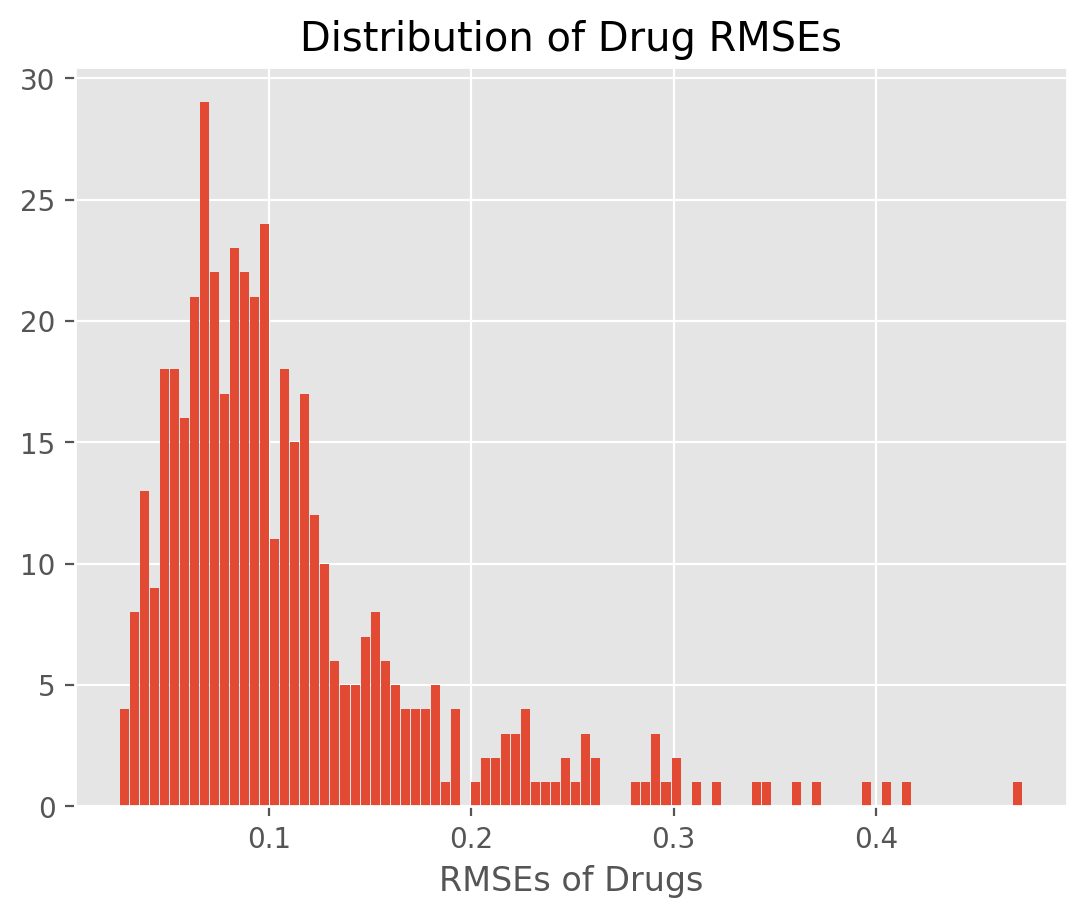

In [16]:
fig, ax1 = plt.subplots()
ax1.hist(x= all_drugs_df_rmse["RMSE"], 
         density = False, 
         bins=90, 
         rwidth = 0.9)
ax1.set_xlabel(f"RMSEs of Drugs")
ax1.set_title("Distribution of Drug RMSEs")

In [17]:
drugs_perf = {}

jobs = []

rmse_jobs = []
worst_drugs = []
rmse_jobs = []
all_locations = []

for job in os.listdir(path):
    j_path = os.path.join(path, job)
    
    rmses_curr = {}
    
    jobs.append(job)
    
    if job in os.listdir(path):
    
        for fold in os.listdir(j_path):
            
            fold_path = os.path.join(j_path, fold)
            
            if os.path.isdir(fold_path):
            
                inner_most = os.path.join(fold_path, job) 
                # print(f"###{fold}####")
                for num in os.listdir(inner_most):
                    num_path = os.path.join(inner_most, num)
                    tsv_file = os.path.join(num_path, "predicted.tsv")
                    df = pd.read_csv(tsv_file, sep="\t")
                    
                    # Getting folder locatio and which drug it is 
                    fold_num = num
                    drug = df["Drug1"][0]
                    
                    rmse = mean_squared_error(df["AUC"], df["PredictedAUC"], squared=False)
                    
                    # print(num, drug)
                    
                    key = (drug, fold_num)
                    rmses_curr[(key)] = rmse
                    # print(rmses_curr)
        worst_drug = max(rmses_curr, key = rmses_curr.get)      
        worst_drug_rmse = rmses_curr[worst_drug]
        print(worst_drug, worst_drug_rmse)
        
        worst_drugs.append(worst_drug[0])
        rmse_jobs.append(worst_drug_rmse)
        all_locations.append(worst_drug[1])
        
bad_drugs = pd.DataFrame({"Job":jobs, "Folder":all_locations, "worst_drug":worst_drugs, "RMSE":rmse_jobs})
bad_drugs.sort_values("RMSE", ascending=False)

# Getting the frequency of each drug in the worst drug array
drugs, counts = np.unique(worst_drugs, return_counts=True)

('Drug_1078', '129') 0.4386975469738552
('Drug_718', '230') 0.4413033379177498
('Drug_1078', '129') 0.478624711045758
('Drug_1078', '129') 0.516860636636217
('Drug_718', '230') 0.4832248748166603
('Drug_1078', '129') 0.4889331647869548
('Drug_1078', '129') 0.47439444254028945
('Drug_1078', '129') 0.49931217281385204
('Drug_1078', '129') 0.46936885592785693
('Drug_1078', '129') 0.4679823028004198


/var/folders/w_/tv9kwn955c59q5gycbr00lzh0000gn/T/ipykernel_15653/1669054811.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(drugs, rotation = 45)


Text(0.5, 0.98, 'Worst Performing Drugs Across All Jobs\n(Worst Drug for Each Job)')

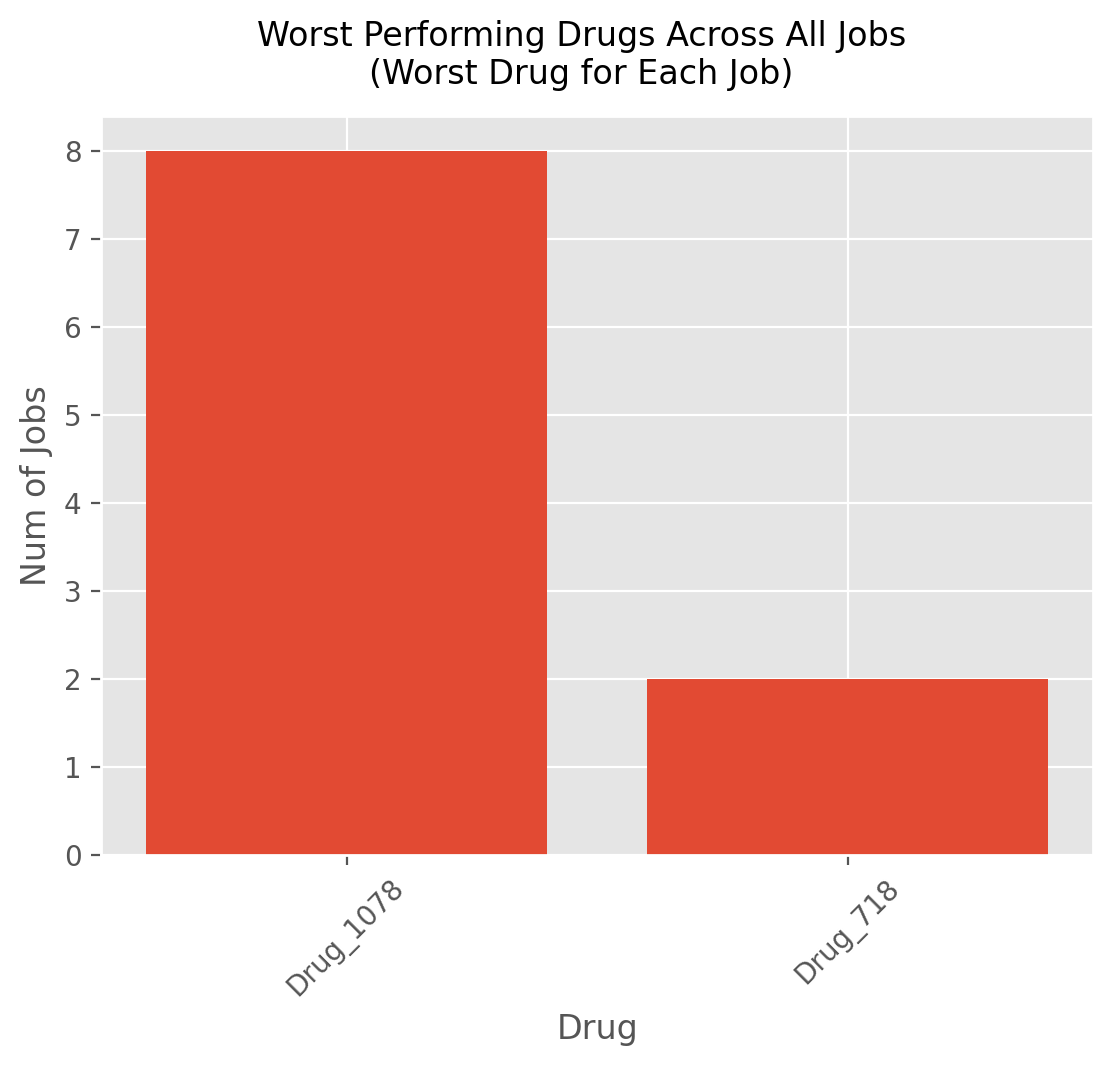

In [18]:
fig, ax = plt.subplots()

ax.bar(drugs, counts)

ax.set_xticklabels(drugs, rotation = 45)
ax.set_ylabel("Num of Jobs")
ax.set_xlabel("Drug")
fig.suptitle("Worst Performing Drugs Across All Jobs\n(Worst Drug for Each Job)")

## Drug 1078 Investigation

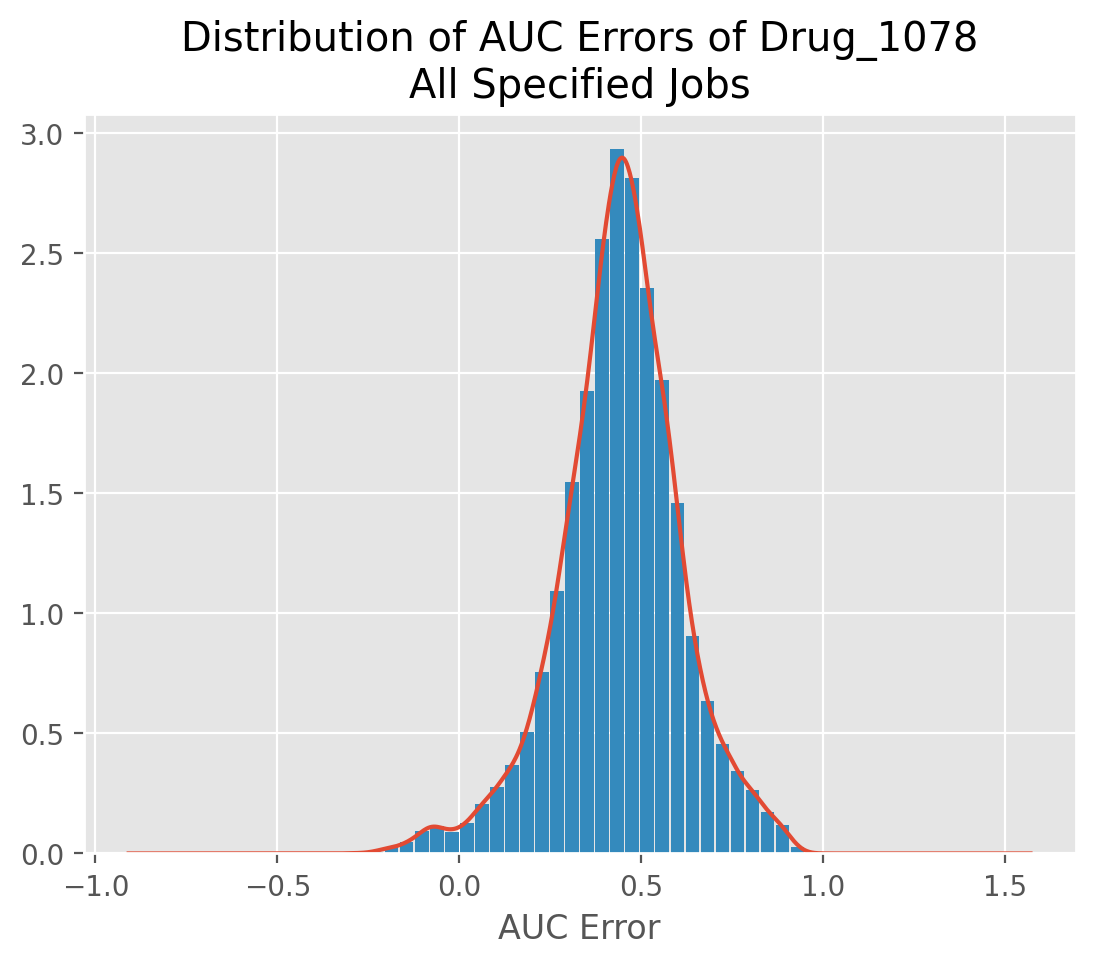

In [19]:
make_distrib_plot("Drug_1078", drug_dict)

In [20]:
for key in tqdm.tqdm(drug_dict.keys()):
     dfs, j= get_all_drug_dfs(key, path=path, wanted_jobs=os.listdir(path))
     print(f"Drug: {key}---dfs: {len(dfs)}")

  0%|          | 1/456 [00:03<28:33,  3.77s/it]

Drug: Drug_618---dfs: 9


  0%|          | 2/456 [00:07<29:05,  3.85s/it]

Drug: Drug_156---dfs: 9


  1%|          | 3/456 [00:11<28:40,  3.80s/it]

Drug: Drug_1175---dfs: 9


  1%|          | 4/456 [00:15<28:31,  3.79s/it]

Drug: Drug_120---dfs: 9


  1%|          | 5/456 [00:18<28:26,  3.78s/it]

Drug: Drug_551---dfs: 9


  1%|▏         | 6/456 [00:22<28:21,  3.78s/it]

Drug: Drug_542---dfs: 9


  2%|▏         | 7/456 [00:26<28:17,  3.78s/it]

Drug: Drug_1193---dfs: 9


  2%|▏         | 8/456 [00:30<28:10,  3.77s/it]

Drug: Drug_749---dfs: 9


  2%|▏         | 9/456 [00:34<28:07,  3.77s/it]

Drug: Drug_1306---dfs: 9


  2%|▏         | 10/456 [00:37<27:58,  3.76s/it]

Drug: Drug_239---dfs: 9


  2%|▏         | 11/456 [00:41<27:56,  3.77s/it]

Drug: Drug_1349---dfs: 9


  3%|▎         | 12/456 [00:45<27:50,  3.76s/it]

Drug: Drug_1137---dfs: 9


  3%|▎         | 13/456 [00:49<27:51,  3.77s/it]

Drug: Drug_1244---dfs: 10


  3%|▎         | 14/456 [00:52<27:46,  3.77s/it]

Drug: Drug_625---dfs: 10


  3%|▎         | 15/456 [00:56<27:41,  3.77s/it]

Drug: Drug_619---dfs: 10


  4%|▎         | 16/456 [01:00<28:03,  3.83s/it]

Drug: Drug_1449---dfs: 10


  4%|▎         | 17/456 [01:04<27:54,  3.81s/it]

Drug: Drug_438---dfs: 10


  4%|▍         | 18/456 [01:08<28:08,  3.85s/it]

Drug: Drug_933---dfs: 10


  4%|▍         | 19/456 [01:12<28:05,  3.86s/it]

Drug: Drug_1021---dfs: 10


  4%|▍         | 20/456 [01:16<27:59,  3.85s/it]

Drug: Drug_1521---dfs: 10


  5%|▍         | 21/456 [01:19<27:56,  3.85s/it]

Drug: Drug_919---dfs: 10


  5%|▍         | 22/456 [01:23<27:46,  3.84s/it]

Drug: Drug_159---dfs: 10


  5%|▌         | 23/456 [01:27<27:48,  3.85s/it]

Drug: Drug_1066---dfs: 10


  5%|▌         | 24/456 [01:31<27:45,  3.86s/it]

Drug: Drug_941---dfs: 10


  5%|▌         | 25/456 [01:35<27:31,  3.83s/it]

Drug: Drug_1474---dfs: 8


  6%|▌         | 26/456 [01:39<27:28,  3.83s/it]

Drug: Drug_687---dfs: 8


  6%|▌         | 27/456 [01:42<27:23,  3.83s/it]

Drug: Drug_983---dfs: 8


  6%|▌         | 28/456 [01:46<27:18,  3.83s/it]

Drug: Drug_1053---dfs: 8


  6%|▋         | 29/456 [01:50<27:11,  3.82s/it]

Drug: Drug_793---dfs: 8


  7%|▋         | 30/456 [01:54<27:08,  3.82s/it]

Drug: Drug_728---dfs: 8


  7%|▋         | 31/456 [01:58<27:01,  3.82s/it]

Drug: Drug_413---dfs: 8


  7%|▋         | 32/456 [02:02<27:13,  3.85s/it]

Drug: Drug_1274---dfs: 8


  7%|▋         | 33/456 [02:05<27:11,  3.86s/it]

Drug: Drug_34---dfs: 8


  7%|▋         | 34/456 [02:09<27:06,  3.85s/it]

Drug: Drug_255---dfs: 8


  8%|▊         | 35/456 [02:13<27:23,  3.90s/it]

Drug: Drug_558---dfs: 8


  8%|▊         | 36/456 [02:17<27:18,  3.90s/it]

Drug: Drug_1197---dfs: 8


  8%|▊         | 37/456 [02:21<27:28,  3.94s/it]

Drug: Drug_430---dfs: 10


  8%|▊         | 37/456 [02:24<27:13,  3.90s/it]


KeyboardInterrupt: 

TOTAL: 10-----((3.0, 4.0))


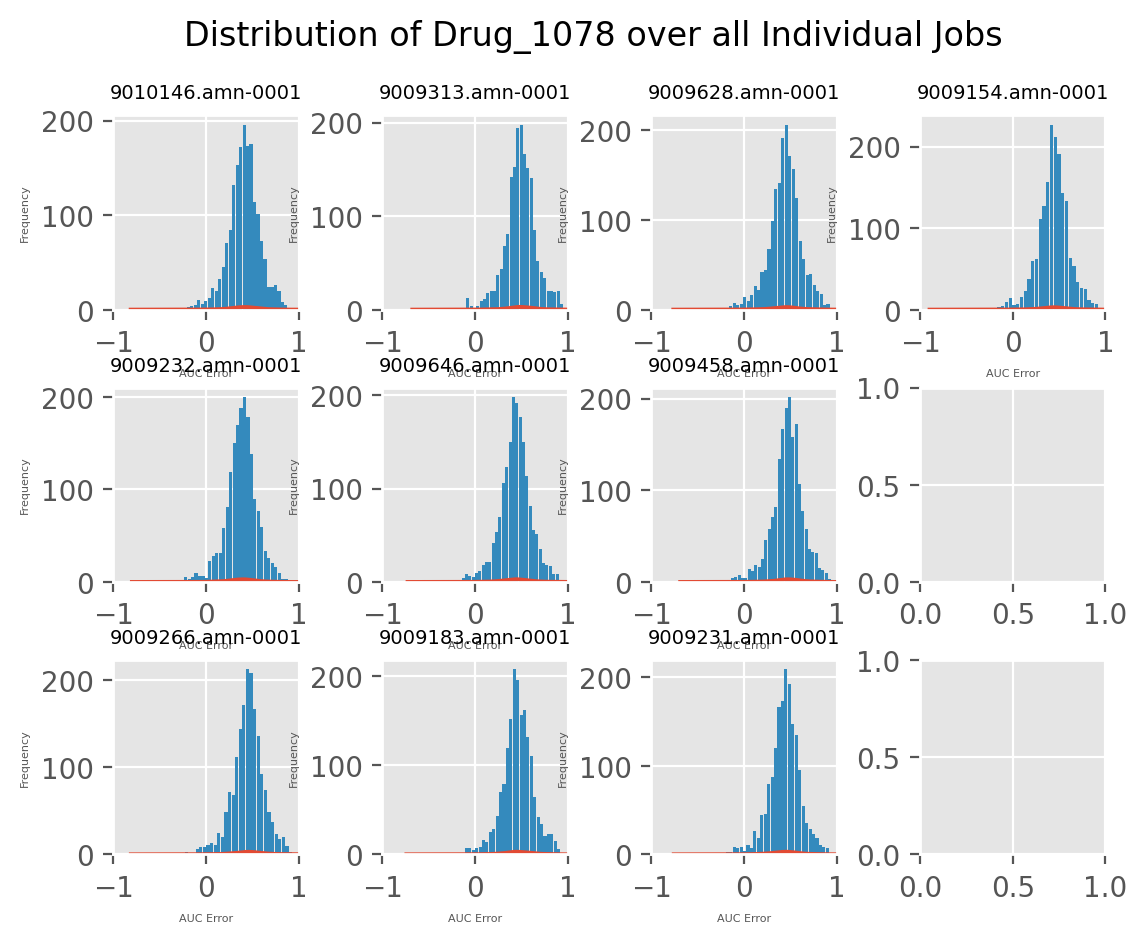

In [21]:
make_multiplot("Drug_1078", path=path, wanted_jobs=os.listdir(path))

In [22]:
boot_1078 = boostraped_rmse(drug_dict["Drug_1078"], 100000)

100%|██████████| 100000/100000 [00:38<00:00, 2582.53it/s]


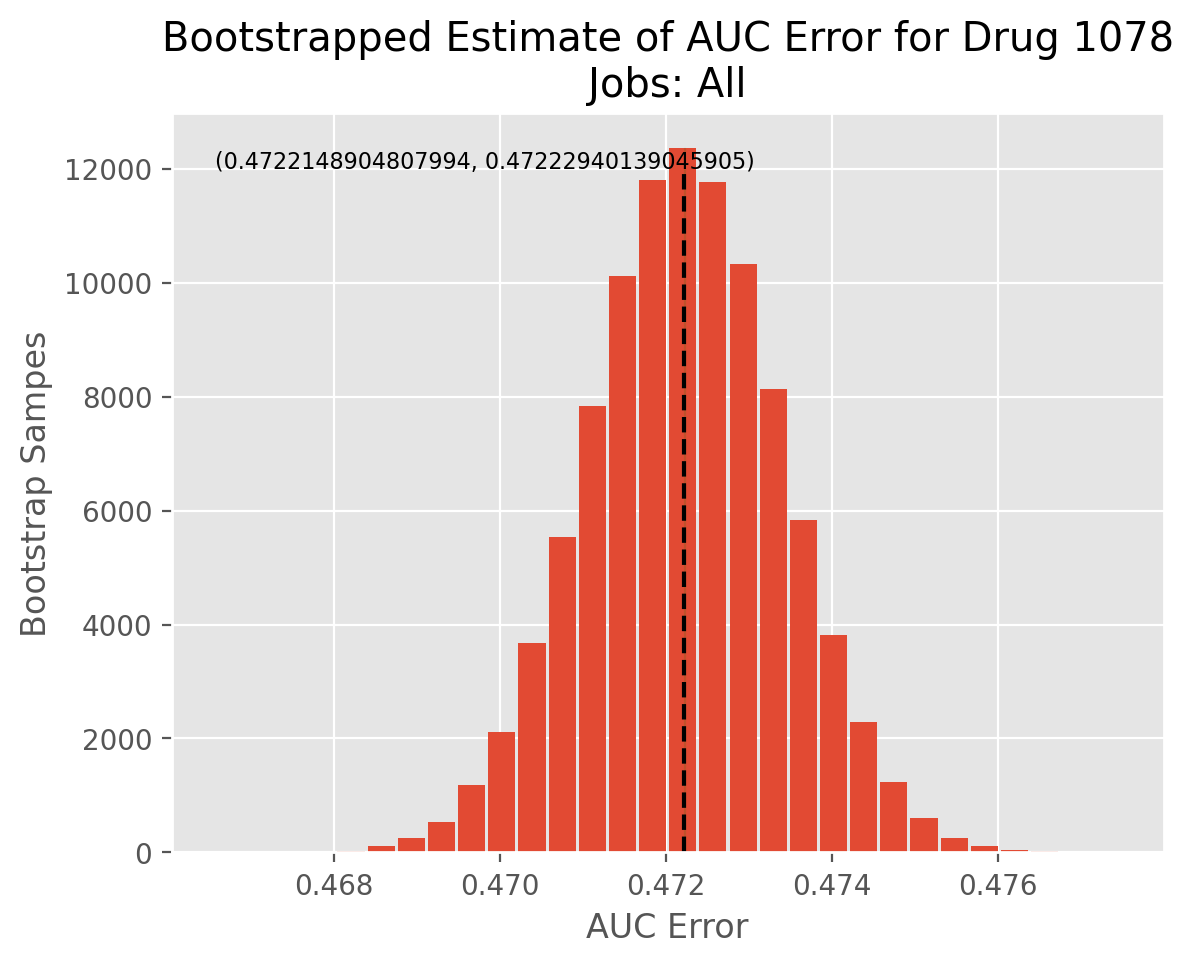

In [23]:
fig, ax = plt.subplots()
confint = st.t.interval(confidence = 0.95, 
                        df = len(boot_1078)-1, 
                        loc = np.mean(boot_1078), 
                        scale = st.sem(boot_1078) )

heights, bins, patches = ax.hist(boot_1078, bins=30, rwidth=0.9)
ax.vlines(x = np.mean(boot_1078), 
          ymin = 0, 
          ymax=12000, 
          colors="black", 
          linestyles="dashed")

ax.set_title(f"Bootstrapped Estimate of AUC Error for Drug 1078\nJobs: All")
ax.set_ylabel("Bootstrap Sampes")
ax.set_xlabel("AUC Error")
ax.text(x = min(boot_1078), y = 12000, s = confint, size = 8)
ax.fill_betweenx([0, heights.max()],confint[0], confint[1], alpha = 0.1, color = "g")

In [24]:
dfs_ALL = []

for val in drug_dict.values():
    dfs_ALL.append(val)
    
df = pd.concat(dfs_ALL)

In [25]:
df

,AUC,Sample,Drug1,PredictedAUC,AUCError
0,0.9901,ACH-000002,Drug_618,0.6198,-0.370300
1,0.9577,ACH-000005,Drug_618,0.5463,-0.411400
2,0.9923,ACH-000008,Drug_618,0.6922,-0.300100
3,0.9221,ACH-000009,Drug_618,0.6542,-0.267900
4,0.9638,ACH-000014,Drug_618,0.6835,-0.280300
...,...,...,...,...,...
643,0.8888,ACH-001075,Drug_752,0.9015,0.012720
644,0.8913,ACH-001239,Drug_752,0.9007,0.009370
645,0.8497,ACH-001306,Drug_752,0.9347,0.084970
646,0.9356,ACH-001307,Drug_752,0.9287,-0.006936


In [26]:
csv = pairwise_tukeyhsd(df["AUCError"], df["Drug1"], alpha = 0.05).summary().as_csv()
turkey_df = pd.read_csv(StringIO(csv), skiprows = 1)
turkey_df["  group1 "] = turkey_df["  group1 "].str.strip()
turkey_df["  group2 "] = turkey_df["  group2 "].str.strip()

In [27]:
print(turkey_df[turkey_df["  group1 "] == "Drug_1078"].to_string())
# print(turkey_df["  group1 "])
# print(turkey_df.to_string())


         group1     group2   meandiff  p-adj    lower    upper   reject
10644  Drug_1078  Drug_1082   -0.2731     0.0  -0.2793  -0.2669  True  
10645  Drug_1078  Drug_1085   -0.4992     0.0  -0.5060  -0.4924  True  
10646  Drug_1078  Drug_1086   -0.5733     0.0  -0.5809  -0.5658  True  
10647  Drug_1078  Drug_1096   -0.3842     0.0  -0.3908  -0.3775  True  
10648  Drug_1078  Drug_1097   -0.4468     0.0  -0.4533  -0.4403  True  
10649  Drug_1078  Drug_1098   -0.4561     0.0  -0.4667  -0.4455  True  
10650  Drug_1078  Drug_1099   -0.4453     0.0  -0.4558  -0.4348  True  
10651  Drug_1078  Drug_1100   -0.4413     0.0  -0.4475  -0.4350  True  
10652  Drug_1078  Drug_1101   -0.4285     0.0  -0.4392  -0.4179  True  
10653  Drug_1078  Drug_1110   -0.4227     0.0  -0.4273  -0.4182  True  
10654  Drug_1078  Drug_1116   -0.3935     0.0  -0.3987  -0.3884  True  
10655  Drug_1078  Drug_1117   -0.2685     0.0  -0.2747  -0.2622  True  
10656  Drug_1078  Drug_1122   -0.3017     0.0  -0.3086  -0.2947 

In [28]:
jobs_75 = ['8997987.amn-0001', '8999189.amn-0001', '8998722.amn-0001','8999163.amn-0001']
dict_75 =get_data_ALL(path=path1, wanted_jobs=jobs_75)


100%|██████████| 144/144 [00:00<00:00, 3286.70it/s]


In [29]:
dict_75["Drug_988"]

,AUC,Sample,Drug1,PredictedAUC,AUCError
0,0.2903,ACH-000001,Drug_988,0.3989,0.10860
1,0.2636,ACH-000002,Drug_988,0.3680,0.10440
2,0.2858,ACH-000002,Drug_988,0.3475,0.06174
3,0.2929,ACH-000002,Drug_988,0.3611,0.06815
4,0.3114,ACH-000002,Drug_988,0.3865,0.07509
...,...,...,...,...,...
1896,0.3578,ACH-001307,Drug_988,0.9416,0.58380
1897,0.4194,ACH-001307,Drug_988,0.8959,0.47650
1898,0.3146,ACH-001318,Drug_988,0.9335,0.61890
1899,0.6505,ACH-001318,Drug_988,0.9279,0.27740


In [30]:
dfs_ALL_75 = []

for val in dict_75.values():
    dfs_ALL_75.append(val)
    
df_75 = pd.concat(dfs_ALL_75)
df_75[df_75["Drug1"] == "Drug_988"]

,AUC,Sample,Drug1,PredictedAUC,AUCError
0,0.2903,ACH-000001,Drug_988,0.3989,0.10860
1,0.2636,ACH-000002,Drug_988,0.3680,0.10440
2,0.2858,ACH-000002,Drug_988,0.3475,0.06174
3,0.2929,ACH-000002,Drug_988,0.3611,0.06815
4,0.3114,ACH-000002,Drug_988,0.3865,0.07509
...,...,...,...,...,...
1896,0.3578,ACH-001307,Drug_988,0.9416,0.58380
1897,0.4194,ACH-001307,Drug_988,0.8959,0.47650
1898,0.3146,ACH-001318,Drug_988,0.9335,0.61890
1899,0.6505,ACH-001318,Drug_988,0.9279,0.27740


In [43]:
big_df = pd.concat([df, df_75])
big_df[big_df["Drug1"] == "Drug_988"]


,AUC,Sample,Drug1,PredictedAUC,AUCError
0,0.9901,ACH-000002,Drug_618,0.6198,-0.37030
1,0.9577,ACH-000005,Drug_618,0.5463,-0.41140
2,0.9923,ACH-000008,Drug_618,0.6922,-0.30010
3,0.9221,ACH-000009,Drug_618,0.6542,-0.26790
4,0.9638,ACH-000014,Drug_618,0.6835,-0.28030
...,...,...,...,...,...
721,0.8177,ACH-001190,Drug_977,0.8422,0.02447
722,0.8307,ACH-001190,Drug_977,0.8795,0.04878
723,0.8895,ACH-001306,Drug_977,0.7050,-0.18450
724,0.7553,ACH-001307,Drug_977,0.7430,-0.01227


In [77]:
aucdf = (big_df
    .groupby("Drug1")
    .agg({
        "AUCError":"mean"
    })
    .reset_index()
    .sort_values("AUCError", key=np.abs, ascending=False)
    
)

aucdf

,Drug1,AUCError
29,Drug_1078,0.441117
599,Drug_988,0.397629
30,Drug_1079,0.393502
492,Drug_736,0.388223
73,Drug_118,0.361173
...,...,...
64,Drug_1151,0.000680
230,Drug_1539,0.000661
379,Drug_457,-0.000558
42,Drug_1100,-0.000174


Text(0.5, 1.0, 'Mean AUCErrors for all Drugs')

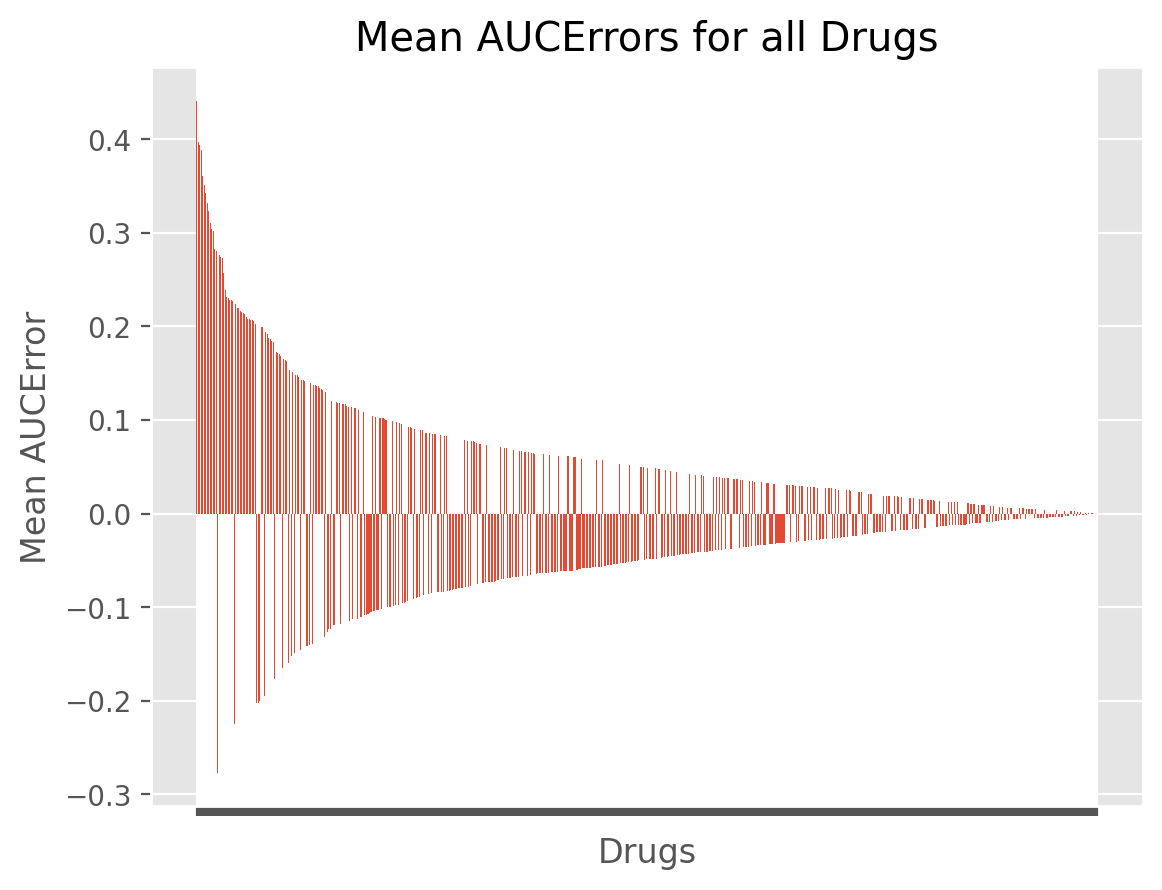

In [78]:
fig, ax = plt.subplots()

ax.bar(x = pd.Categorical(aucdf["Drug1"]), height=aucdf["AUCError"], width=0.7)
ax.set_xticklabels([])

ax.set_ylabel("Mean AUCError")
ax.set_xlabel("Drugs")
ax.set_title("Mean AUCErrors for all Drugs")

In [32]:
csv = pairwise_tukeyhsd(big_df["AUCError"], big_df["Drug1"], alpha = 0.05).summary().as_csv()
turkey_df = pd.read_csv(StringIO(csv), skiprows = 1)
turkey_df["  group1 "] = turkey_df["  group1 "].str.strip()
turkey_df["  group2 "] = turkey_df["  group2 "].str.strip()

In [33]:
print(turkey_df[turkey_df["  group1 "] == "Drug_1078"].to_string())
print(turkey_df[turkey_df["  group2 "] == "Drug_1078"].to_string())

         group1     group2   meandiff  p-adj    lower    upper   reject
16965  Drug_1078  Drug_1079   -0.0476     0.0  -0.0582  -0.0370  True  
16966  Drug_1078  Drug_1082   -0.2731     0.0  -0.2796  -0.2666  True  
16967  Drug_1078  Drug_1085   -0.4992     0.0  -0.5063  -0.4921  True  
16968  Drug_1078  Drug_1086   -0.5733     0.0  -0.5813  -0.5654  True  
16969  Drug_1078  Drug_1087   -0.4060     0.0  -0.4116  -0.4004  True  
16970  Drug_1078  Drug_1088   -0.4820     0.0  -0.4926  -0.4714  True  
16971  Drug_1078   Drug_109   -0.4634     0.0  -0.4708  -0.4560  True  
16972  Drug_1078  Drug_1094   -0.2570     0.0  -0.2672  -0.2468  True  
16973  Drug_1078  Drug_1096   -0.3842     0.0  -0.3912  -0.3772  True  
16974  Drug_1078  Drug_1097   -0.4468     0.0  -0.4536  -0.4400  True  
16975  Drug_1078  Drug_1098   -0.4561     0.0  -0.4672  -0.4450  True  
16976  Drug_1078  Drug_1099   -0.4453     0.0  -0.4563  -0.4343  True  
16977  Drug_1078  Drug_1100   -0.4413     0.0  -0.4479  -0.4347 

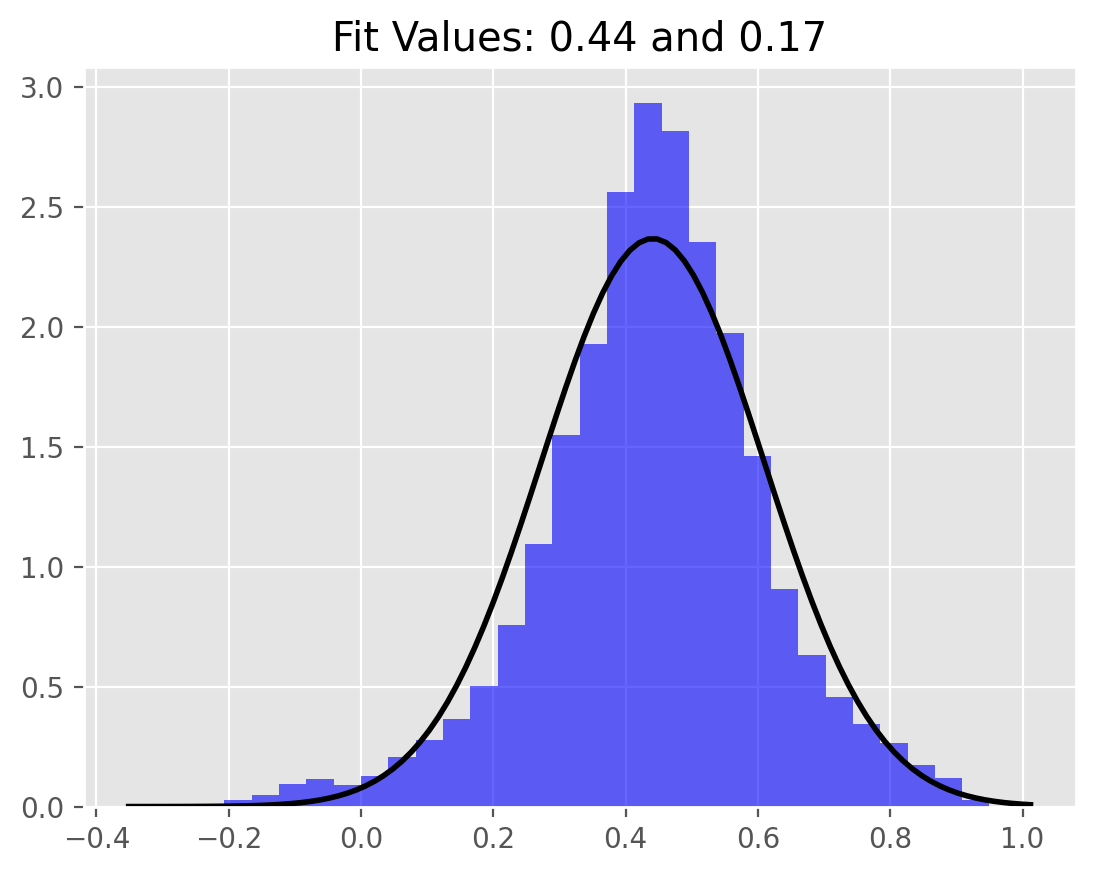

In [37]:
norm_hist(drug_dict["Drug_1078"]["AUCError"])

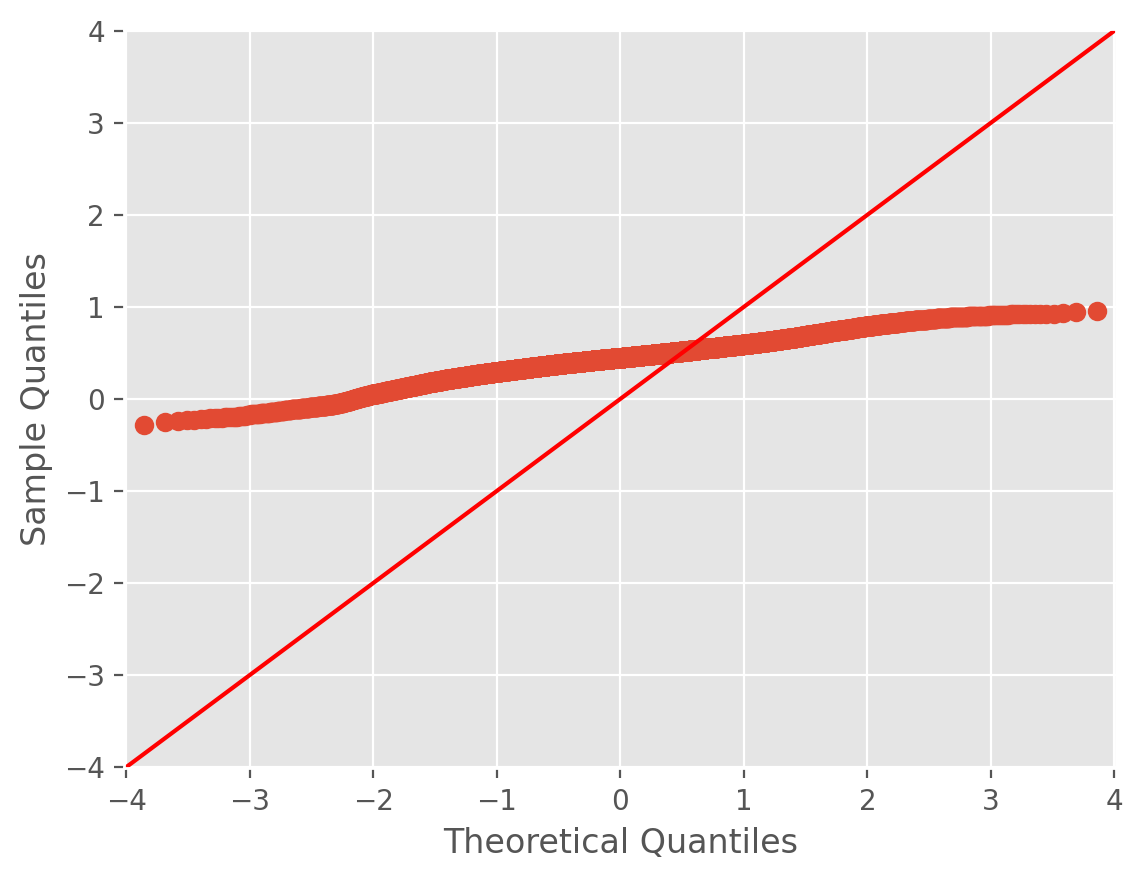

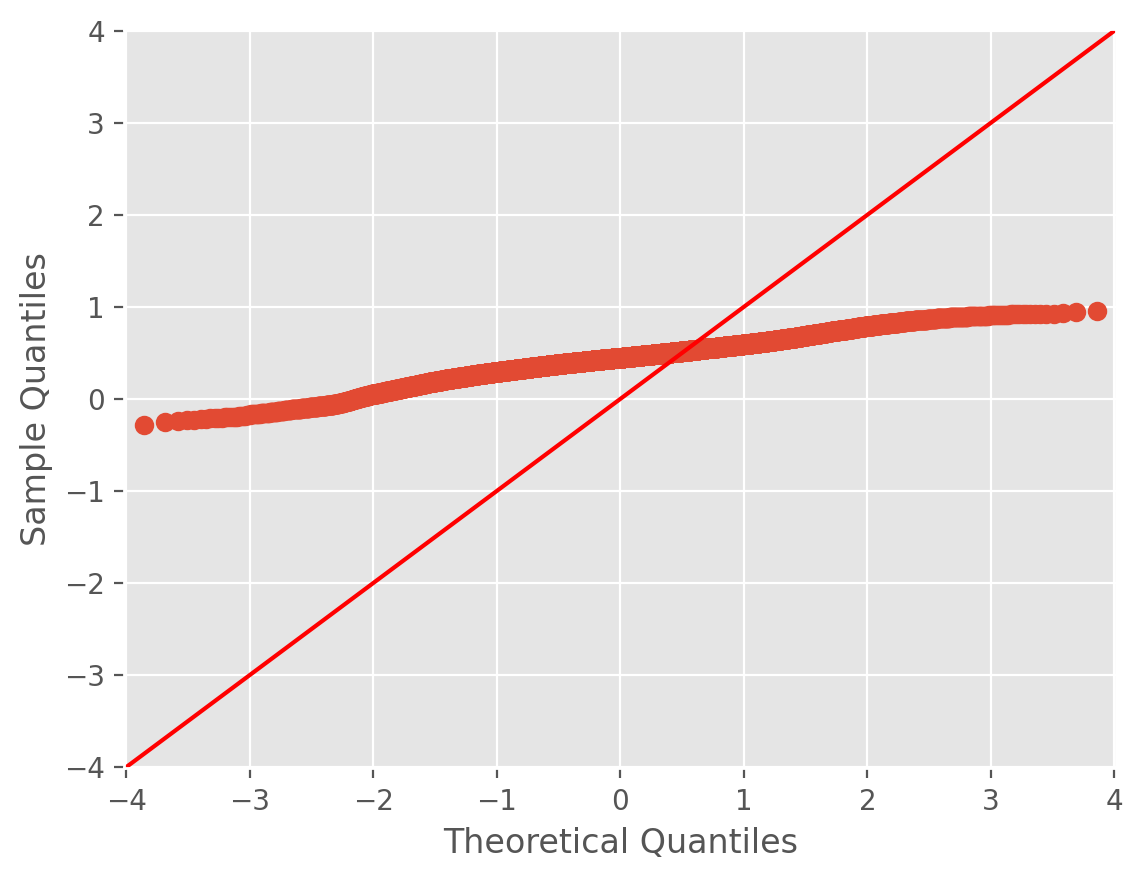

In [40]:
sm.qqplot(drug_dict["Drug_1078"]["AUCError"], line="45")